In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [155]:
df=pd.read_csv('D:\Machine_learning\csv_files\Job_Placement_Data.csv')

In [156]:
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [157]:
df.drop(columns=['ssc_board','hsc_percentage','hsc_board','hsc_subject','undergrad_degree','specialisation'],inplace=True)

In [158]:
df.head()

,gender,ssc_percentage,degree_percentage,work_experience,emp_test_percentage,mba_percent,status
0,M,67.00,58.00,No,55.0,58.80,Placed
1,M,79.33,77.48,Yes,86.5,66.28,Placed
2,M,65.00,64.00,No,75.0,57.80,Placed
3,M,56.00,52.00,No,66.0,59.43,Not Placed
4,M,85.80,73.30,No,96.8,55.50,Placed


In [159]:
df.shape

(215, 7)

In [160]:
df.describe()

,ssc_percentage,degree_percentage,emp_test_percentage,mba_percent
count,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.370186,72.100558,62.278186
std,10.827205,7.358743,13.275956,5.833385
min,40.890000,50.000000,50.000000,51.210000
25%,60.600000,61.000000,60.000000,57.945000
50%,67.000000,66.000000,71.000000,62.000000
75%,75.700000,72.000000,83.500000,66.255000
max,89.400000,91.000000,98.000000,77.890000


In [161]:
df.isnull().sum()

gender                 0
ssc_percentage         0
degree_percentage      0
work_experience        0
emp_test_percentage    0
mba_percent            0
status                 0
dtype: int64

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [163]:
x=df.drop(columns='status')
y=df['status']

In [164]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [165]:
x_train.head()

,gender,ssc_percentage,degree_percentage,work_experience,emp_test_percentage,mba_percent
30,F,64.0,73.0,No,52.00,56.70
74,M,56.6,70.2,No,84.27,67.20
103,M,73.0,73.0,Yes,85.00,65.83
88,F,66.0,73.0,No,58.00,64.36
86,M,62.0,64.0,No,67.00,57.03


C:\Users\hp\AppData\Local\Temp\ipykernel_15104\182875935.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['degree_percentage'])


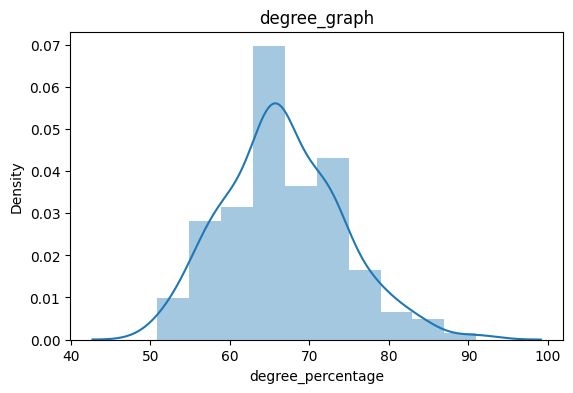

Text(0.5, 1.0, 'deg_per_QQ')

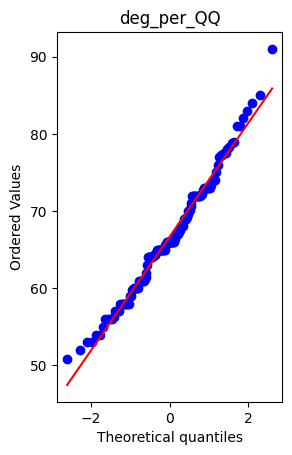

In [166]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.distplot(x_train['degree_percentage'])
plt.title('degree_graph')
plt.show()

plt.subplot(122)
stats.probplot(x_train['degree_percentage'],dist='norm',plot=plt)
plt.title('deg_per_QQ')

C:\Users\hp\AppData\Local\Temp\ipykernel_15104\3820606845.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['ssc_percentage'])


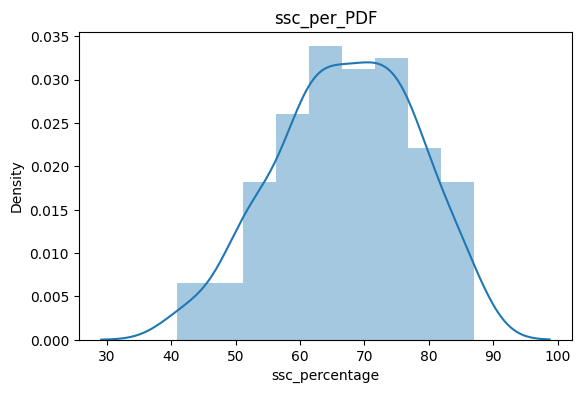

Text(0.5, 1.0, 'ssc_per_QQ')

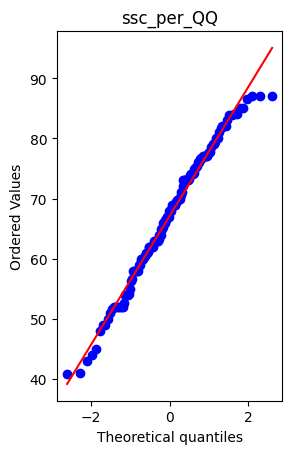

In [167]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.distplot(x_train['ssc_percentage'])
plt.title('ssc_per_PDF')
plt.show()

plt.subplot(122)
stats.probplot(x_train['ssc_percentage'],dist='norm',plot=plt)
plt.title('ssc_per_QQ')

C:\Users\hp\AppData\Local\Temp\ipykernel_15104\162749374.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['emp_test_percentage'])


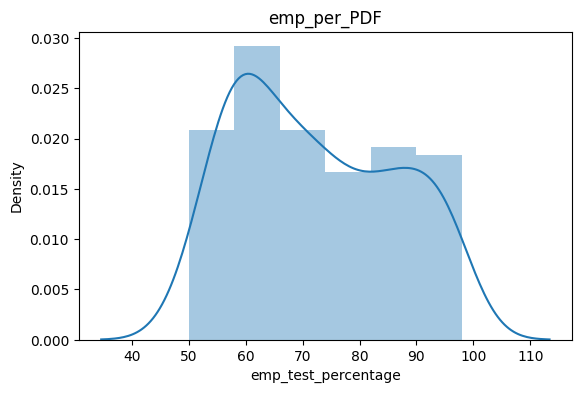

Text(0.5, 1.0, 'emp_per_QQ')

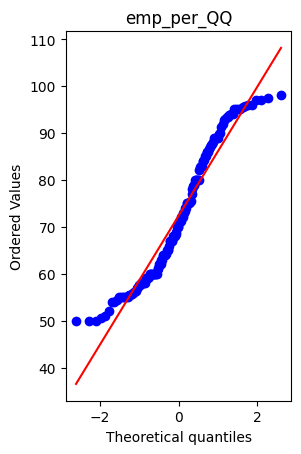

In [168]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.distplot(x_train['emp_test_percentage'])
plt.title('emp_per_PDF')
plt.show()

plt.subplot(122)
stats.probplot(x_train['emp_test_percentage'],dist='norm',plot=plt)
plt.title('emp_per_QQ')

In [169]:
x_train.head()

,gender,ssc_percentage,degree_percentage,work_experience,emp_test_percentage,mba_percent
30,F,64.0,73.0,No,52.00,56.70
74,M,56.6,70.2,No,84.27,67.20
103,M,73.0,73.0,Yes,85.00,65.83
88,F,66.0,73.0,No,58.00,64.36
86,M,62.0,64.0,No,67.00,57.03


In [170]:
trf1=ColumnTransformer(
    [
        ('gender',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'),[0])
    ],
remainder='passthrough')

In [171]:
trf2=ColumnTransformer(
    [
        ('work_experience',OrdinalEncoder(categories=[['No','Yes']]),[3])
    ]
,remainder="passthrough")

In [172]:
trf4=DecisionTreeClassifier()

In [173]:
pipe=Pipeline([
        ('trf1',trf1),
        ('trf2',trf2),
        ('trf4',trf4),
    ])

In [174]:
pipe.fit(x_train,y_train)

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gender',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [0])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('work_experience',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes']]),
                                                  [3])])),
                ('trf4', DecisionTreeClassifier())])

In [175]:
y_pred=pipe.predict(x_test)

In [176]:
from sklearn.metrics import accuracy_score
print('accuracy: ',accuracy_score(y_test,y_pred))

accuracy:  0.7846153846153846


In [178]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe,x_train,y_train,cv=10,scoring='accuracy').mean()

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was rename

0.76

In [182]:
import pickle
with open('D:\Machine_learning\Practice\pipe.pkl', 'wb') as file:
    pickle.dump(pipe, file)